In [89]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

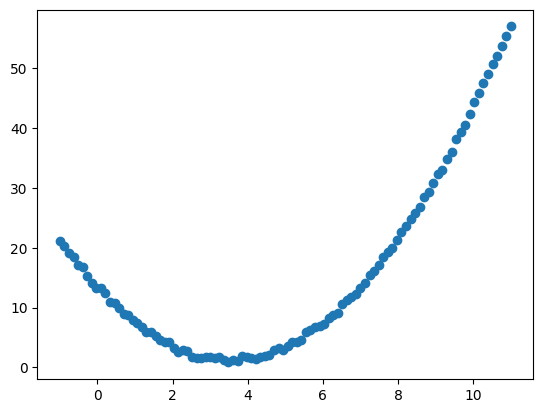

In [90]:
#创建数据
x =np.linspace(-1,11,num = 100)
y = (x - 5) ** 2 + 3 * x - 12 + np.random.rand(100)
x = x.reshape(-1,1)
plt.scatter(x,y)

### 使用线性回归进行预测

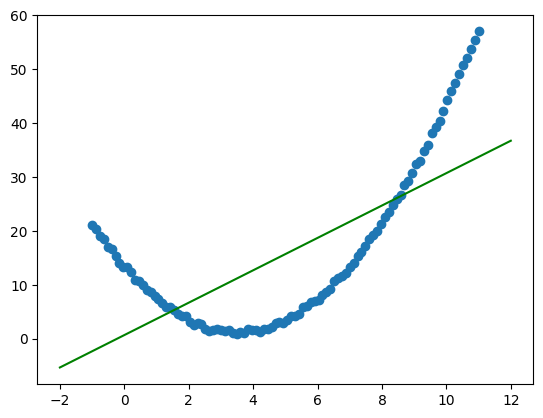

In [91]:
model = LinearRegression()
x_test =np.linspace(-2,12,num = 300).reshape(-1,1)
model.fit(x,y)
y_pred = model.predict(x_test)
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='green')

### 数据升维

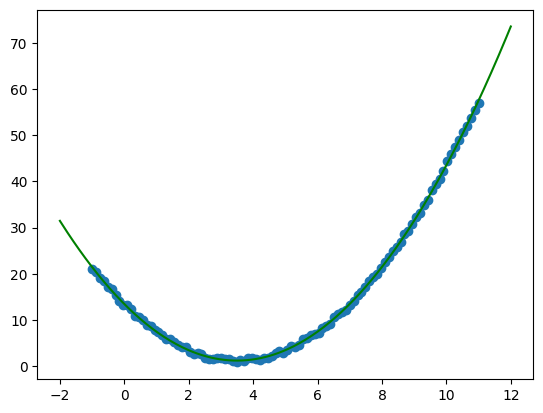

In [92]:
x_ = x ** 2
x_ = np.concatenate([x,x_],axis = 1)
model = LinearRegression()
x_test =np.linspace(-2,12,num = 300).reshape(-1,1)
x_test_ = np.concatenate([x_test,x_test ** 2],axis = 1)
model.fit(x_,y)
y_pred = model.predict(x_test_)
plt.scatter(x,y)
#算法预测结果，依然使用原数据（升维是不是在一次幂的基础上，进行了平方）
plt.plot(x_test,y_pred,color='green')

### 多项式升维实战（二）

In [93]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
#PolynomialFeatures 多项式，升维
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

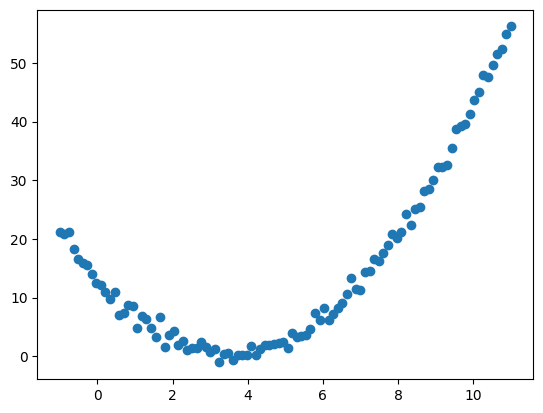

In [94]:
x =np.linspace(-1,11,num = 100)
y = (x - 5)**2 + 3 * x - 12 + np.random.randn(100) 
x = x.reshape(-1,1)
plt.scatter(x,y)

In [95]:
x_test =np.linspace(-2,12,num = 300).reshape(-1,1)
x_test.shape

(300, 1)

In [96]:
poly = PolynomialFeatures(interaction_only=True) #特征和特征之间进行相乘
A = [[3]]
poly.fit_transform(A)

array([[1., 3.]])

In [97]:
poly = PolynomialFeatures(interaction_only=False) #特征和特征之间进行相乘,并且自己和自己进行运算
A = [[3]]
poly.fit_transform(A)

array([[1., 3., 9.]])

In [98]:
poly = PolynomialFeatures(degree=2) 
x2 = poly.fit_transform(x)
x2.shape
x_test2 = poly.transform(x_test)

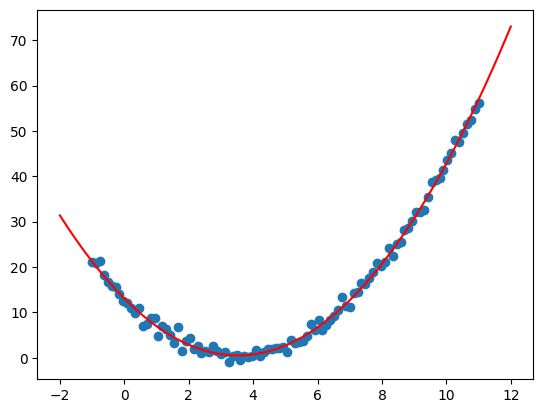

In [99]:
model = LinearRegression()
model.fit(x2,y)
y_pred = model.predict(x_test2)
plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')

### 天猫双十一线性拟合

In [100]:
from sklearn.linear_model import LinearRegression,SGDRegressor
import numpy as np
import matplotlib.pyplot as plt
#PolynomialFeatures 多项式，升维
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

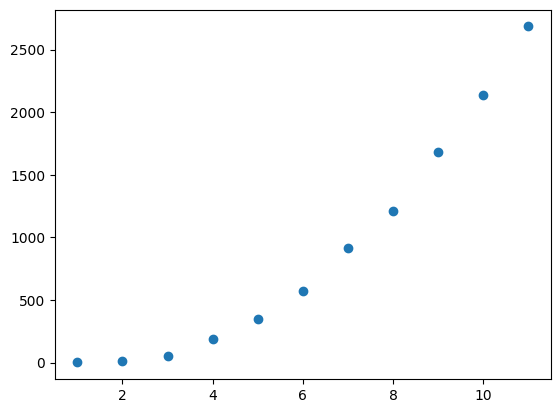

In [101]:
x = np.arange(2009,2020).reshape(-1,1) - 2008
y = np.array([0.5,9.36,52,191,350,571,912,1207,1682,2135,2684])
#display(x,y)
plt.scatter(x,y)

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.]])

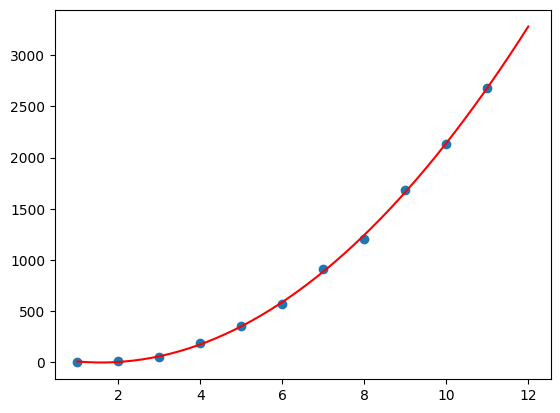

In [115]:
x_test =np.linspace(2009,2020,50).reshape(-1,1) - 2008
poly = PolynomialFeatures(degree=2,interaction_only=False)
x_2 = poly.fit_transform(x)
display(x_2)
# sgd = SGDRegressor(max_iter= 5000)
# sgd.fit(x_2,y)
model = LinearRegression(fit_intercept=False)
model.fit(x_2,y)
x_test2 = poly.fit_transform(x_test)
y_pred = model.predict(x_test2)

plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')

In [118]:
x_2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.],
       [  1.,  11., 121.]])

In [119]:
model.coef_

array([ 72.66460606, -95.53875524,  30.23736597])

$f(x) = 30.23 x^2 -95.53 x + 72.66$

In [123]:
from sklearn.preprocessing import StandardScaler

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03]])

array([[ 0.        , -1.58113883, -1.15498576, -0.92062337],
       [ 0.        , -1.26491106, -1.0779867 , -0.90430853],
       [ 0.        , -0.9486833 , -0.94965495, -0.86002538],
       [ 0.        , -0.63245553, -0.7699905 , -0.77378977],
       [ 0.        , -0.31622777, -0.53899335, -0.63161755],
       [ 0.        ,  0.        , -0.2566635 , -0.41952458],
       [ 0.        ,  0.31622777,  0.07699905, -0.12352668],
       [ 0.        ,  0.63245553,  0.4619943 ,  0.27036028],
       [ 0.        ,  0.9486833 ,  0.89832225,  0.77612046],
       [ 0.        ,  1.26491106,  1.38598291,  1.40773802],
       [ 0.        ,  1.58113883,  1.92497626,  2.1791971 ]])

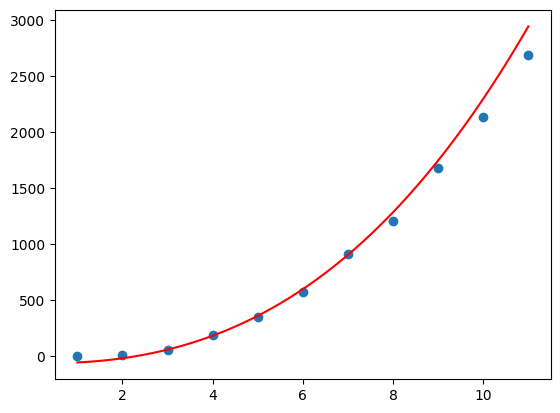

In [149]:
x_test =np.linspace(2009,2019,50).reshape(-1,1) - 2008
#数据升维
poly = PolynomialFeatures(degree=3,interaction_only=False)
x_2 = poly.fit_transform(x)
display(x_2)
stardard = StandardScaler()
#归一化（标准化）
x_2_norm = stardard.fit_transform(x_2)
display(x_2_norm)
sgd = SGDRegressor(fit_intercept=True,eta0=0.5,max_iter=10000)
#随机梯度下降训练
sgd.fit(x_2_norm,y)
#数据升维
x_test2 = poly.fit_transform(x_test)
#归一化（标准化）
x_test2_norm = stardard.fit_transform(x_test2)
#预测
y_pred = sgd.predict(x_test2_norm)

plt.scatter(x,y)
plt.plot(x_test,y_pred,color='red')

In [147]:
sgd.coef_

array([  0.        ,  60.20422561, 270.80109333, 567.69817826])